In [1]:
from __future__ import annotations

from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import models.elec_motor_model as elecmotmod
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
def abbrange(letter: str, a: int, b: int) -> Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a, b))

In [3]:
abbrs = tuple(abbrange("H", 1, 37))
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )

In [4]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    emm_df = elecmotmod.emm_main(abbr, verbose=False)
    dfs[abbr] = emm_df

In [5]:
model_name = elecmotmod.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir="dc-motor")
model_name = elecmotmod.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

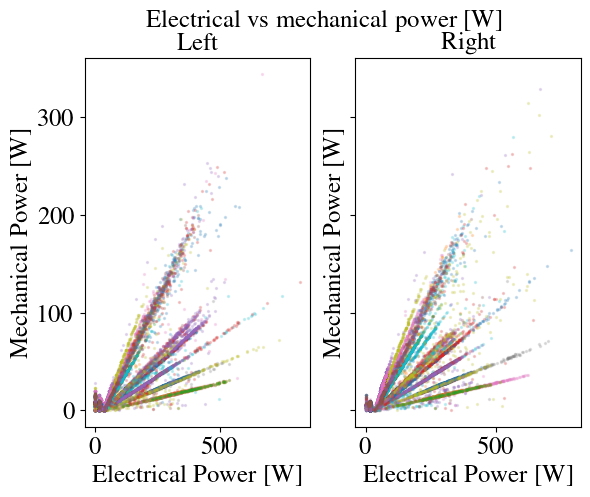

In [6]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True)
for abbr in abbrs:
    df = dfs[abbr]
    ax1.scatter(df.PE_L.abs(), df.PM_L.abs(), alpha=0.2, s=2)
    ax2.scatter(df.PE_R.abs(), df.PM_R.abs(), alpha=0.2, s=2)

ax1.set_xlabel("Electrical Power [W]")
ax1.set_ylabel("Mechanical Power [W]")
ax1.set_title("Left")

ax2.set_xlabel("Electrical Power [W]")
ax2.set_ylabel("Mechanical Power [W]")
ax2.set_title("Right")


fig.suptitle("Electrical vs mechanical power [W]")
fig.savefig(figdir / f"{model_name}_power.jpg", bbox_inches="tight")


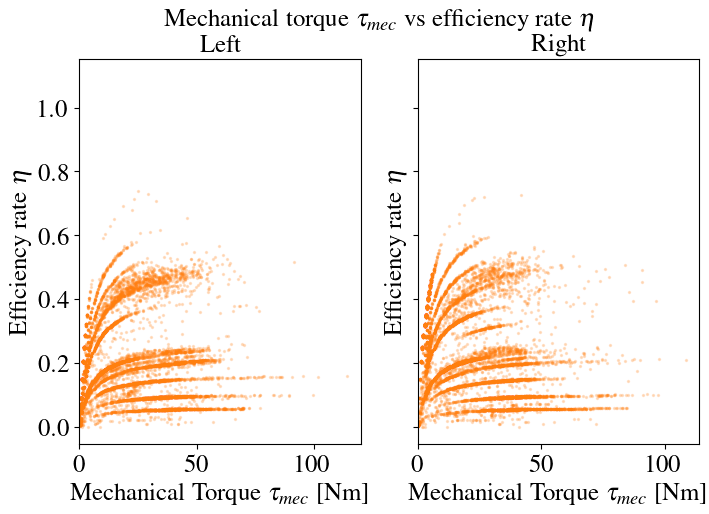

In [7]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, figsize=(8, 5))
for abbr in abbrs:
    df = dfs[abbr]
    ax1.scatter(df.TL, df.eta_L.abs(), c="C1", alpha=0.2, s=2)
    ax2.scatter(df.TR, df.eta_R.abs(), c="C1", alpha=0.2, s=2)

ax1.set_xlim(left=0)
ax1.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax1.set_ylabel("Efficiency rate $\eta$")
ax1.set_title("Left")

ax2.set_xlim(left=0)
ax2.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax2.set_ylabel("Efficiency rate $\eta$")
ax2.set_title("Right")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

fig.savefig(figdir / f"{model_name}_torque-efficiency.jpg", bbox_inches="tight")


In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
for abbr in abbrs:
    df = dfs[abbr]
    ax.scatter(df.TL, df.eta_L.abs(), c="C1", alpha=0.2, s=2)
    ax.scatter(df.TR, df.eta_R.abs(), c="C1", alpha=0.2, s=2)

ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Efficiency rate $\eta$")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-efficiency.{ext}", bbox_inches="tight")


In [9]:
fig, ax = plt.subplots()
ax.plot(emm_df.time_rel, emm_df.Rloss_L, label="Left")
ax.plot(emm_df.time_rel, emm_df.Rloss_R, label="Right")
ax.set_ylabel("$R_{loss} [\Omega]$")
ax.legend()
ax.set_title(f"{abbr} - $R_{{Loss}}$ - {model_name}")
fig.savefig(figdir / f"{abbr}_Rlosses.jpg", bbox_inches="tight")

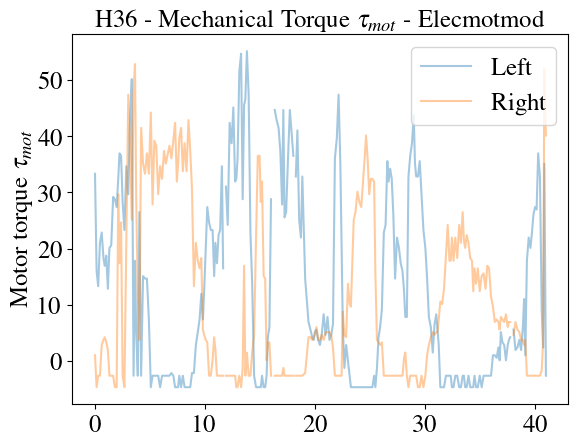

In [10]:
fig, ax = plt.subplots()
ax.plot(emm_df.time_rel, emm_df.TL, label="Left", alpha=0.4)
ax.plot(emm_df.time_rel, emm_df.TR, label="Right", alpha=0.4)
ax.legend()
ax.set_ylabel("Motor torque $\\tau_{{mot}}$")
ax.set_title(f"{abbr} - Mechanical Torque $\\tau_{{mot}}$ - {model_name}")
# ax.set_ylim((0,1))
fig.savefig(figdir / f"{abbr}_torque.jpg", bbox_inches="tight")